In [86]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt



In [87]:
import numpy as np
import pandas as pd

In [88]:
 from tensorflow.keras.datasets import imdb

In [89]:
data = imdb.load_data(num_words= 10000)

In [90]:
(x_train, y_train), (x_test, y_test) = data

In [91]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape



((25000,), (25000,), (25000,), (25000,))

In [92]:
y_train[900]

1

In [93]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [96]:
x_train = pad_sequences(x_train, maxlen  = 200)
x_test = pad_sequences(x_test, maxlen = 200)

In [97]:
x_train[0].shape

x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

In [101]:
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim = 10000, output_dim = 32, input_length=200),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [102]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [103]:
history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7059 - loss: 0.5379 - val_accuracy: 0.8640 - val_loss: 0.3270
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8979 - loss: 0.2582 - val_accuracy: 0.8666 - val_loss: 0.3603
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9289 - loss: 0.1901 - val_accuracy: 0.8728 - val_loss: 0.3389
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9470 - loss: 0.1536 - val_accuracy: 0.8612 - val_loss: 0.3683
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9612 - loss: 0.1107 - val_accuracy: 0.8688 - val_loss: 0.4268
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9732 - loss: 0.0840 - val_accuracy: 0.8670 - val_loss: 0.4896
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9824 - loss: 0.0580 - val_accuracy: 0.8518 - val_loss: 0.4864
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9813 - loss: 0.0587 - val_ac

In [104]:
dict_data = history.history

In [105]:
dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [106]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']

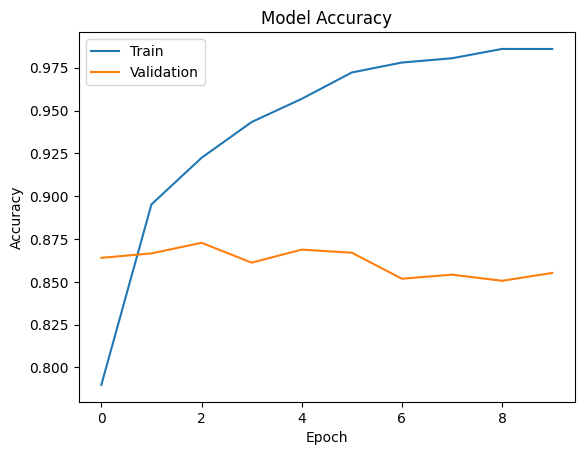

In [107]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

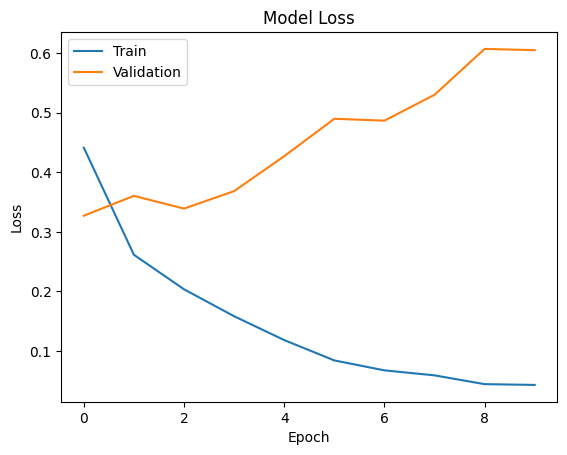

In [108]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [111]:
# print(model.input_shape)
print(x_test[0].shape)

y = model.predict(x_test[0].reshape(1, 200))
print(y)


(200,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[0.06772771]]
